Lab1_ShahabEsfandiar_9819373


Exercise_1

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


1_Data inputs

TypeError: ignored

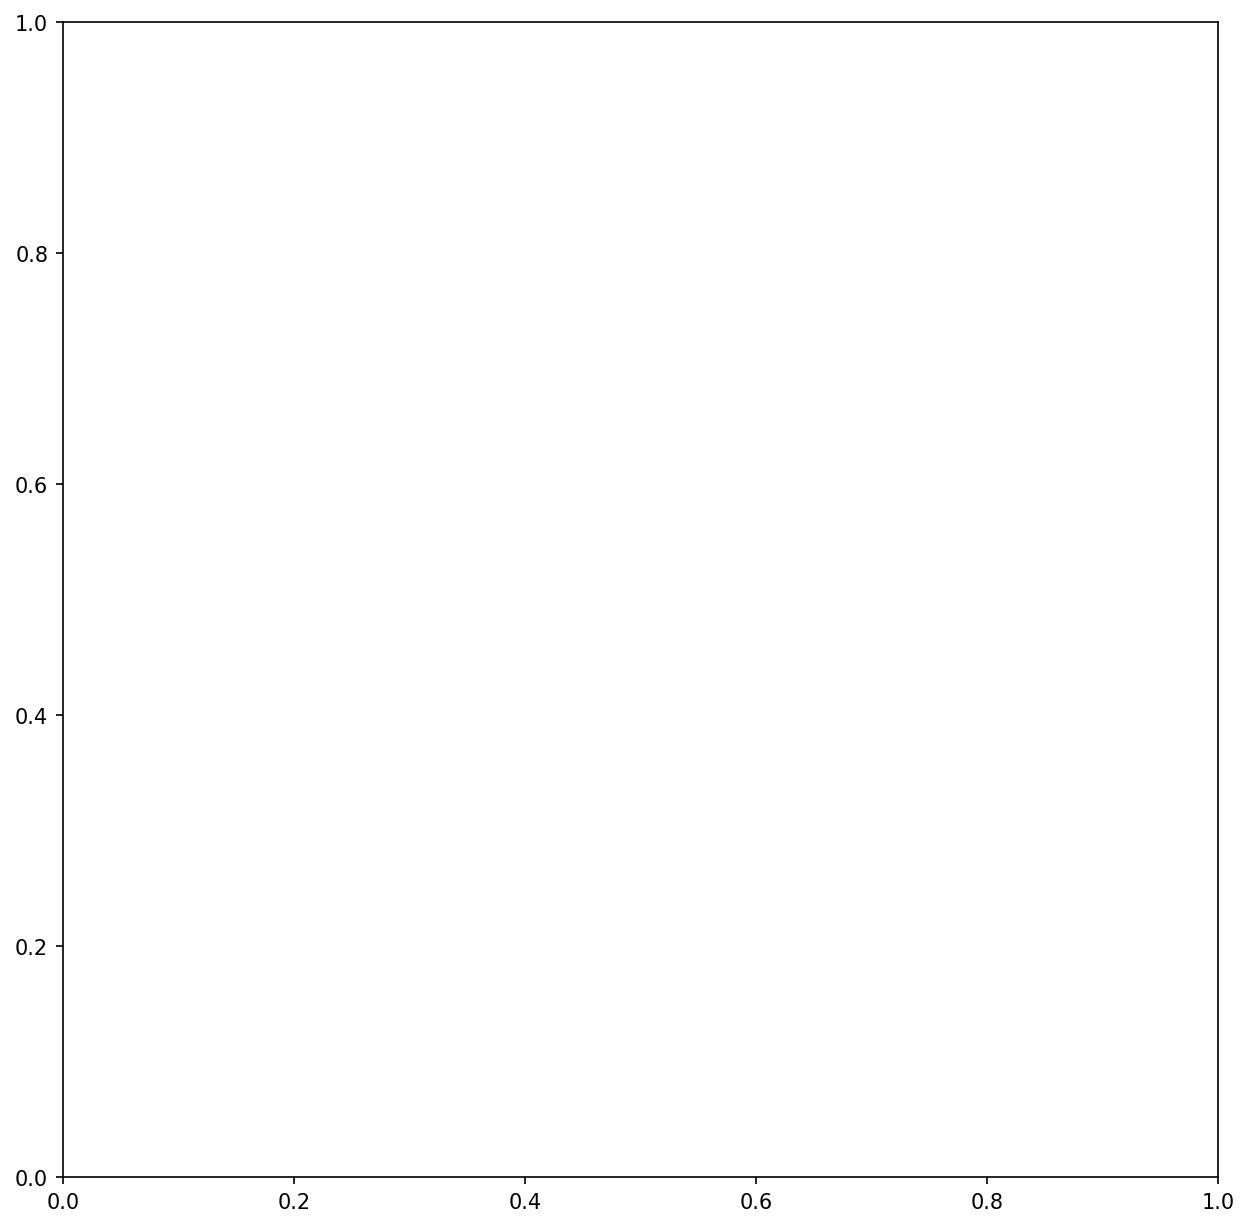

In [ ]:
img = cv2.imread('Part 1.jpg')
plt.figure(figsize=(10, 10), dpi=150)
plt.imshow(img)
np.shape(img)

2_Separate the color image into 3 bands

In [ ]:
plt.figure(figsize=(10, 10), dpi=150)
plt.imshow(img[:, :, 0], cmap = 'gray')

plt.figure(figsize=(10, 10), dpi=150)
plt.imshow(img[:, :, 1], cmap = 'gray')

plt.figure(figsize=(10, 10), dpi=150)
plt.imshow(img[:, :, 2], cmap = 'gray')

3_View and check the histogram for each band

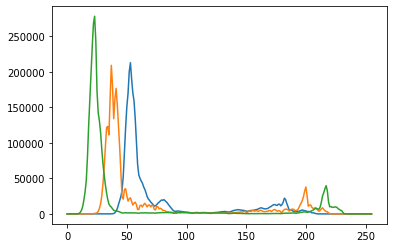

In [ ]:
hist0 = cv2.calcHist([img[:, :, 0]], [0], None, [256], [0, 256])
plt.plot(hist0)

hist1 = cv2.calcHist([img[:, :, 1]], [0], None, [256], [0, 256])
plt.plot(hist1)

hist2 = cv2.calcHist([img[:, :, 2]], [0], None, [256], [0, 256])
plt.plot(hist2)

4_Thresholding operation

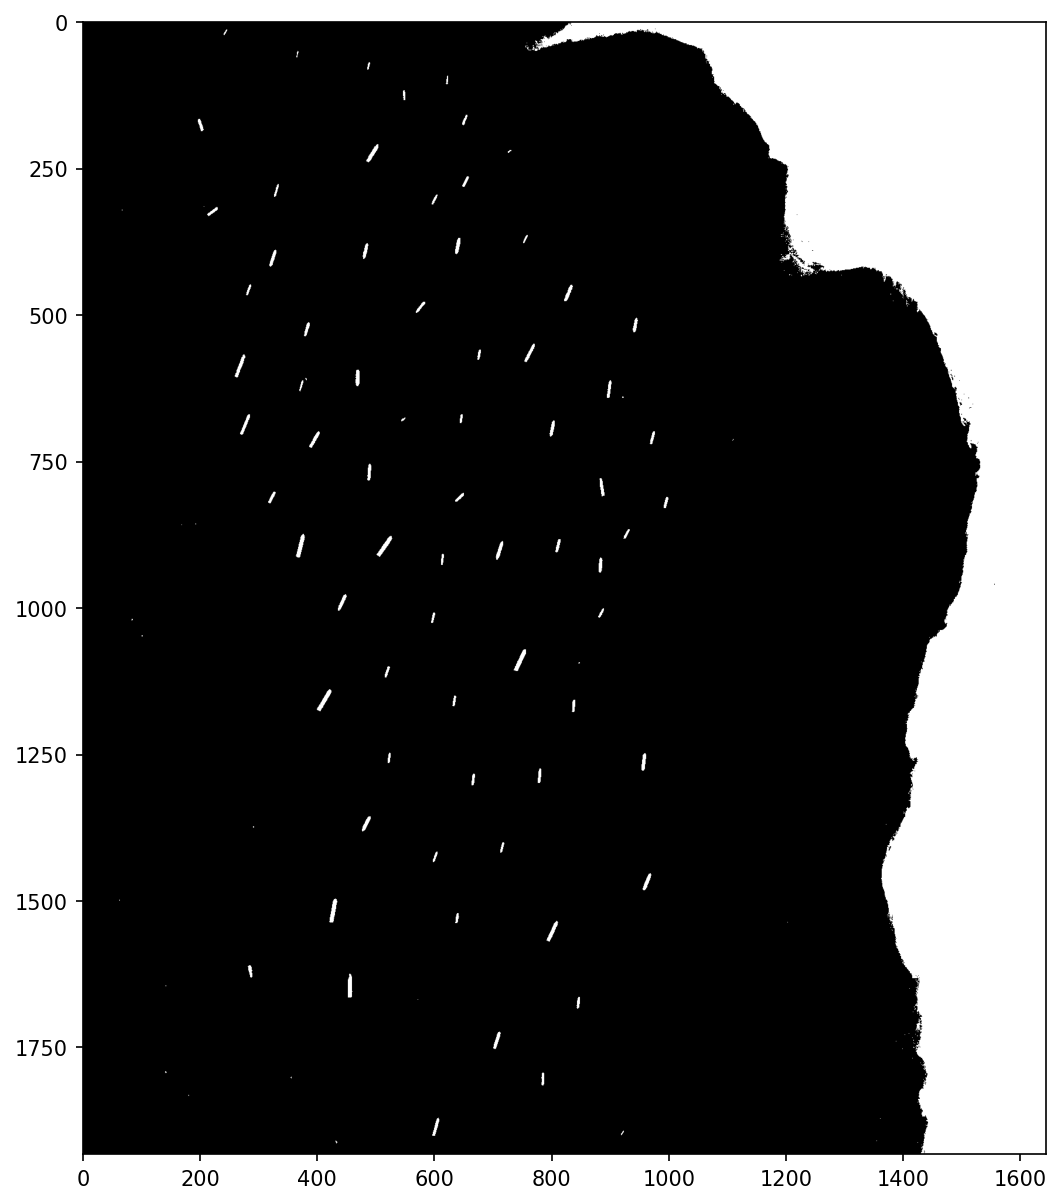

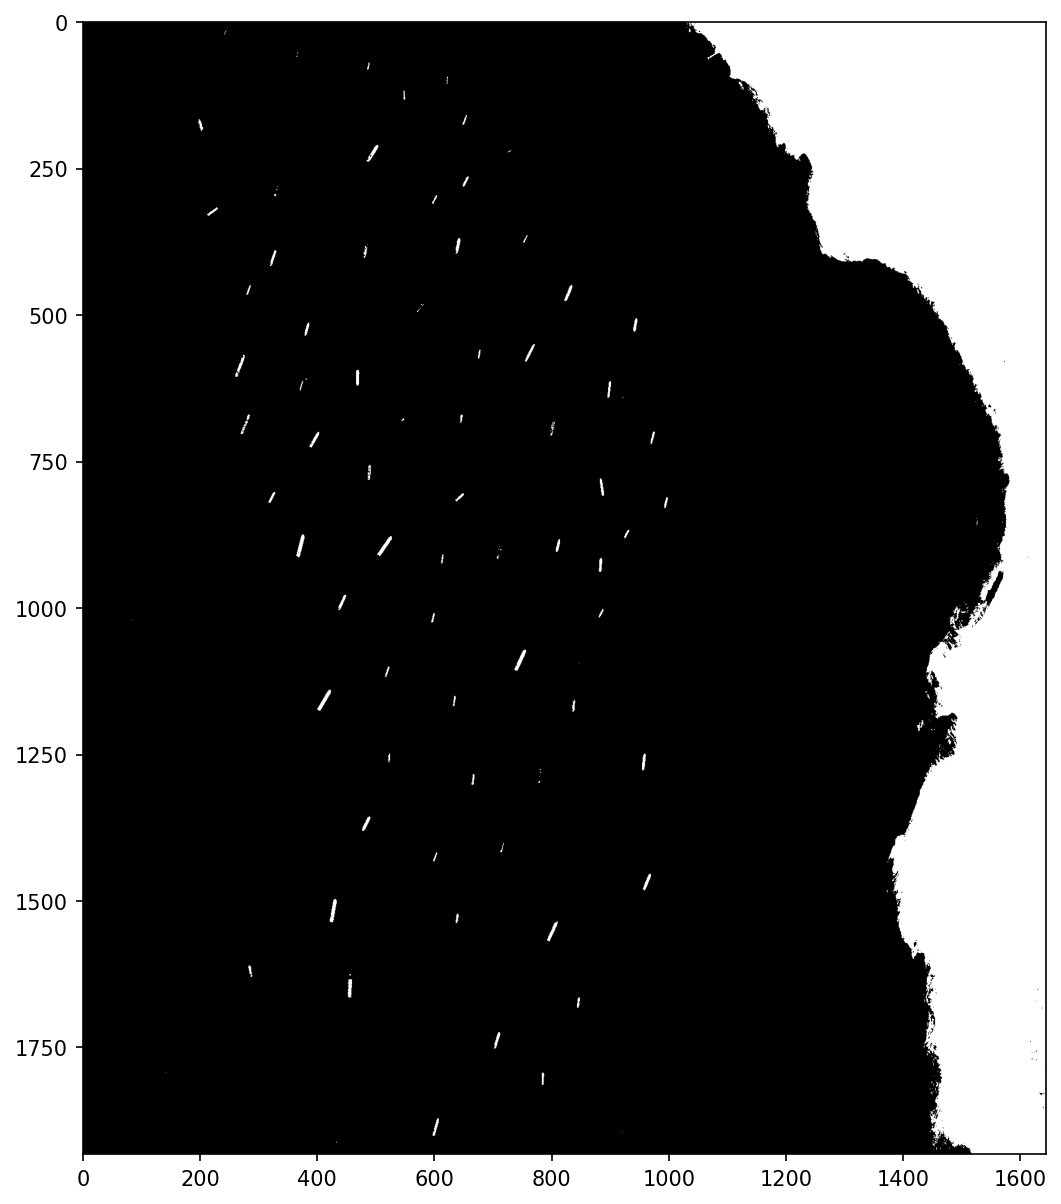

In [ ]:
im_t = np.zeros_like(img)
im_t[img[:, :, 2]>50] = 1

im_o = np.zeros_like(img)
im_o[img[:, :, 2]>100] = 1

plt.figure(figsize=(10, 10), dpi=150)
plt.imshow(im_t[:, :, 0], cmap = 'gray')

plt.figure(figsize=(10, 10), dpi=150)
plt.imshow(im_o[:, :, 0], cmap = 'gray')

5_The process of calculating number of ships


In [ ]:
from skimage.measure import label, regionprops, regionprops_table
import pandas as pd


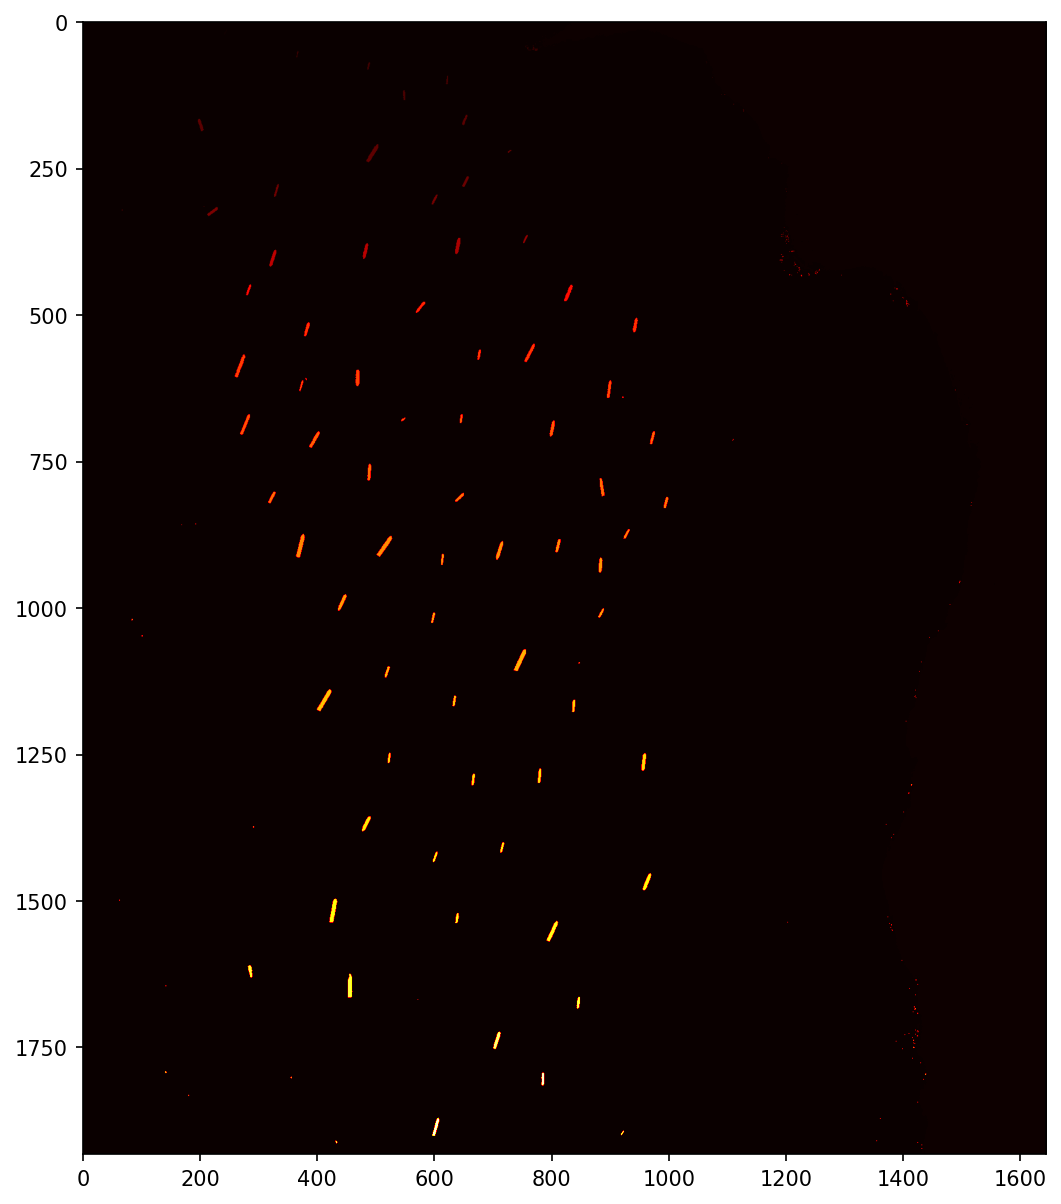

In [ ]:
label_im = label(im_t[:, :, 0])

plt.figure(figsize=(10, 10), dpi=150)
plt.imshow(label_im, cmap = 'hot')

In [ ]:
np.unique(label_im, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [ ]:
properties_im = ['label', 'area']
table_im = regionprops_table(label_im, properties=properties_im)

pd.DataFrame(table_im)

label    area
0        1  525818
1        2      24
2        3       1
3        4       3
4        5       1
..     ...     ...
223    224       9
224    225       1
225    226       1
226    227       1
227    228       1

[228 rows x 2 columns]

 6_histogram equalization mode

In [ ]:
img_eq=cv2.equalizeHist(img[:, :, 2])

plt.figure(figsize=(10, 10), dpi=150)
plt.imshow(img_eq, cmap = 'gray')


TypeError: ignored

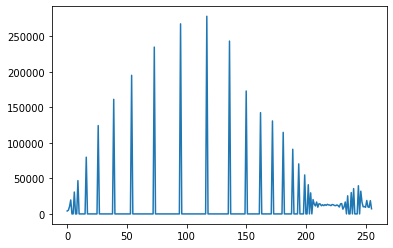

In [ ]:
hist_eq = cv2.calcHist([img_eq], [0], None, [256], [0, 256])
plt.plot(hist_eq)


In [ ]:
im_eq = np.zeros_like(img_eq)
im_eq[img_eq>200] = 1

plt.figure(figsize=(10, 10), dpi=150)
plt.imshow(img_eq, cmap = 'gray')


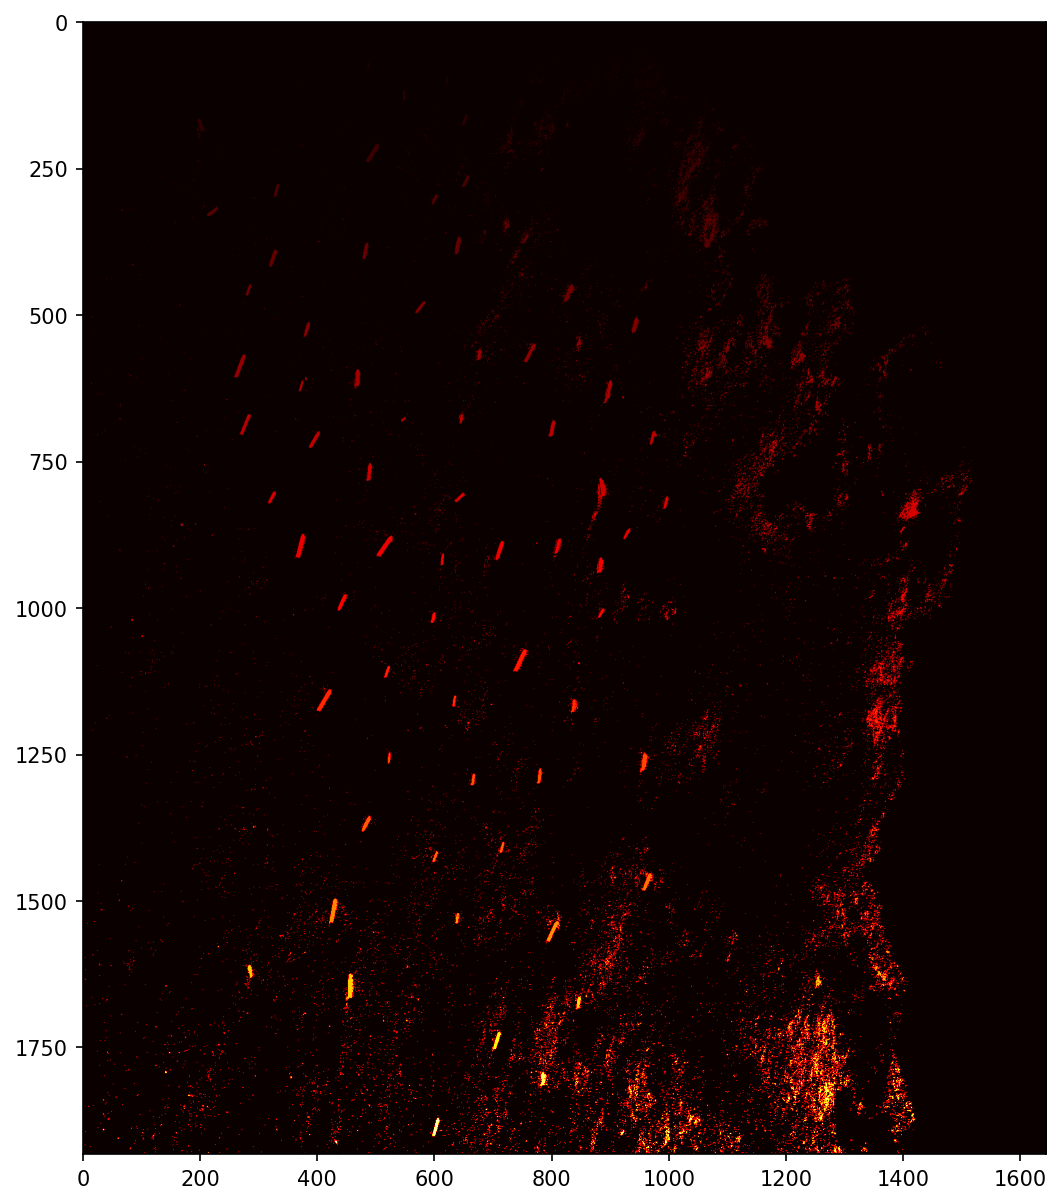

In [ ]:
label_eq = label(im_eq)

plt.figure(figsize=(10, 10), dpi=150)
plt.imshow(label_eq, cmap = 'hot')

In [ ]:
np.unique(label_eq, return_counts=True)

(array([    0,     1,     2, ..., 18308, 18309, 18310]),
 array([2479069,       2,       2, ...,       1,       1,       1]))

In [ ]:
properties_eq = ['label', 'area']
table_eq = regionprops_table(label_eq, properties=properties_eq)

pd.DataFrame(table_eq)

label  area
0          1     2
1          2     2
2          3     1
3          4     1
4          5     1
...      ...   ...
18305  18306     1
18306  18307     1
18307  18308     1
18308  18309     1
18309  18310     1

[18310 rows x 2 columns]

7_The number of the ships

In [ ]:
i=0
for n in range(228):
  if(table_im['area'][n]>20):
    i=i+1

disp

In [ ]:
print(i-1)

70


we have alomst 70 ships in our image

--------------------------------------------------------





Exercise_2

In [ ]:
from skimage.exposure import match_histograms

1_Choose source image

In [ ]:
master = cv2.imread('3_A.bmp')
slave = cv2.imread('3_B.bmp')

In [ ]:
np.shape(master)

(2700, 4725, 3)

In [ ]:
np.shape(slave)

(2700, 4725, 3)

2_View and check the histogram for each band in master image

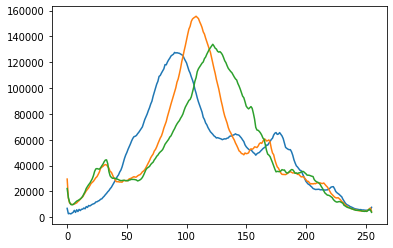

In [ ]:
hist_m0 = cv2.calcHist([master[:, :, 0]], [0], None, [256], [0, 256])
plt.plot(hist_m0)

hist_m1 = cv2.calcHist([master[:, :, 1]], [0], None, [256], [0, 256])
plt.plot(hist_m1)

hist_m2 = cv2.calcHist([master[:, :, 2]], [0], None, [256], [0, 256])
plt.plot(hist_m2)

3_View and check the histogram for each band in slave image

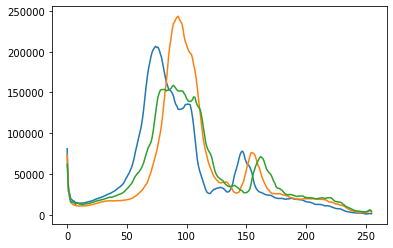

In [ ]:
hist_s0 = cv2.calcHist([slave[:, :, 0]], [0], None, [256], [0, 256])
plt.plot(hist_s0)

hist_s1 = cv2.calcHist([slave[:, :, 1]], [0], None, [256], [0, 256])
plt.plot(hist_s1)

hist_s2 = cv2.calcHist([slave[:, :, 2]], [0], None, [256], [0, 256])
plt.plot(hist_s2)

4_Histogram matching operation

In [ ]:
matched = match_histograms(slave, master, multichannel=True)

In [ ]:
matched_0 = match_histograms(slave[:, :, 0], master[:, :, 0])

In [ ]:
matched_1 = match_histograms(slave[:, :, 1], master[:, :, 1])

In [ ]:
matched_2 = match_histograms(slave[:, :, 2], master[:, :, 2])

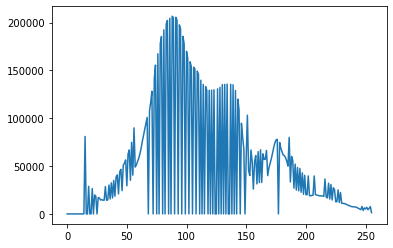

In [ ]:
hist_m = cv2.calcHist([matched[:, :, 0]], [0], None, [256], [0, 256])
plt.plot(hist_m)

5_Show images for compare

For multi channel

(<matplotlib.axes._subplots.AxesSubplot at 0x7f02e45c8c90>,
 <matplotlib.image.AxesImage at 0x7f02e45521d0>)

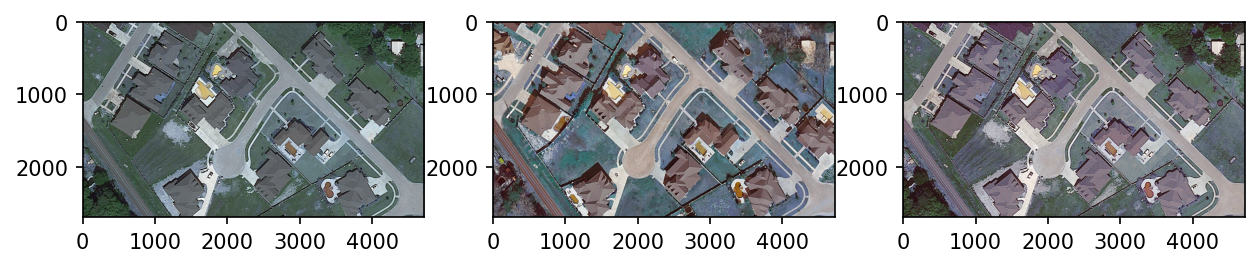

In [ ]:
plt.figure(figsize=(10, 10), dpi=150)
plt.subplot(131), plt.imshow(slave)
plt.subplot(132), plt.imshow(master)
plt.subplot(133), plt.imshow(matched)

For channel 0

(<matplotlib.axes._subplots.AxesSubplot at 0x7f02e6983290>,
 <matplotlib.image.AxesImage at 0x7f02e487e2d0>)

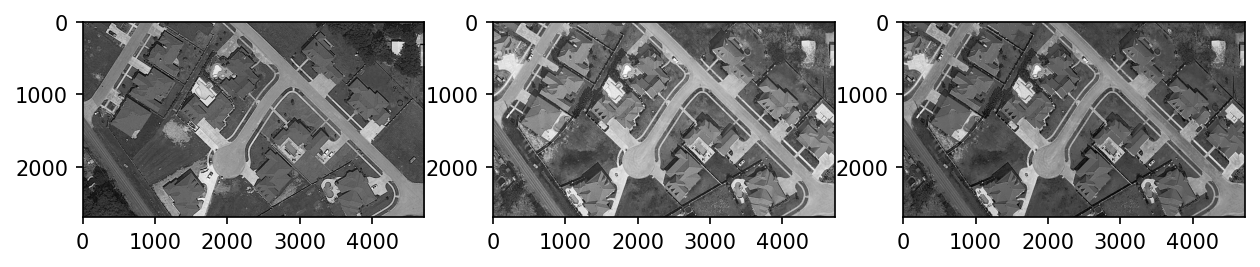

In [ ]:
plt.figure(figsize=(10, 10), dpi=150)
plt.subplot(131), plt.imshow(master[:, :, 0], cmap = 'gray')
plt.subplot(132), plt.imshow(slave[:, :, 0], cmap = 'gray')
plt.subplot(133), plt.imshow(matched_0, cmap = 'gray')

For channel 1

(<matplotlib.axes._subplots.AxesSubplot at 0x7f02e6ac27d0>,
 <matplotlib.image.AxesImage at 0x7f02e69f6610>)

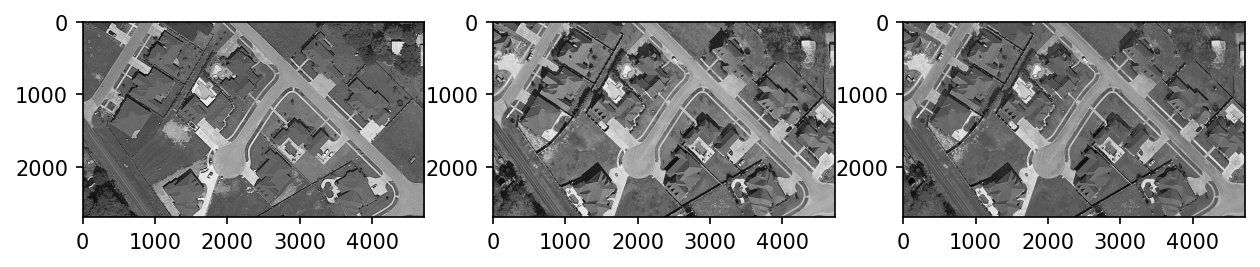

In [ ]:
plt.figure(figsize=(10, 10), dpi=150)
plt.subplot(131), plt.imshow(master[:, :, 1], cmap = 'gray')
plt.subplot(132), plt.imshow(slave[:, :, 1], cmap = 'gray')
plt.subplot(133), plt.imshow(matched_1, cmap = 'gray')

For channel 2

(<matplotlib.axes._subplots.AxesSubplot at 0x7f02e6bb3a90>,
 <matplotlib.image.AxesImage at 0x7f02e6b25d10>)

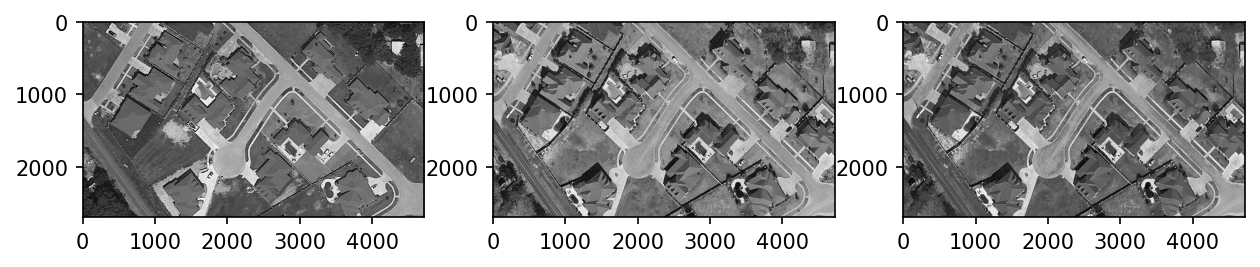

In [ ]:
plt.figure(figsize=(10, 10), dpi=150)
plt.subplot(131), plt.imshow(master[:, :, 2], cmap = 'gray')
plt.subplot(132), plt.imshow(slave[:, :, 2], cmap = 'gray')
plt.subplot(133), plt.imshow(matched_2, cmap = 'gray')

6_Subtraction of images

Without histogram_matcing

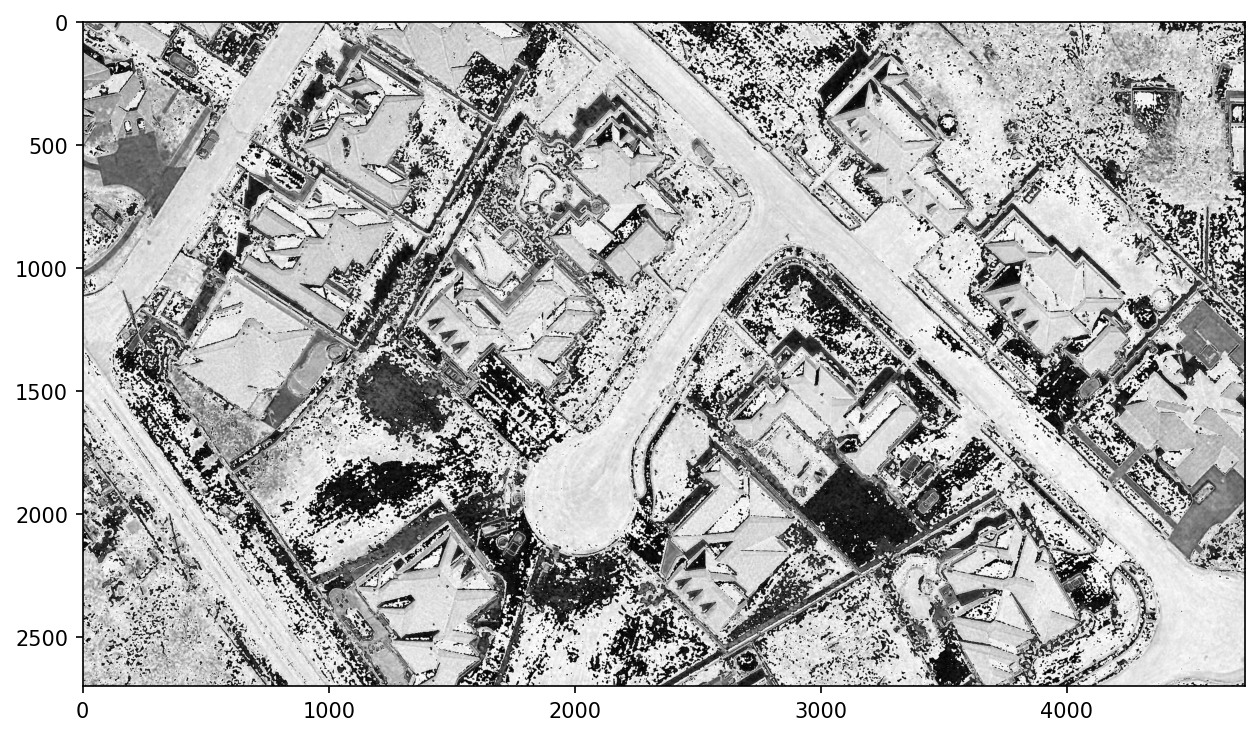

In [ ]:
plt.figure(figsize=(10, 10), dpi=150)
plt.imshow(slave[:, :, 0]-master[:, :, 0], cmap = 'gray')

With histogram_matching

In [ ]:
plt.figure(figsize=(10, 10), dpi=150)
plt.imshow(matched[:, :, 0]-master[:, :, 0], cmap = 'gray')

7_Show subtract's histograms for multi channel

Without histogram_matching

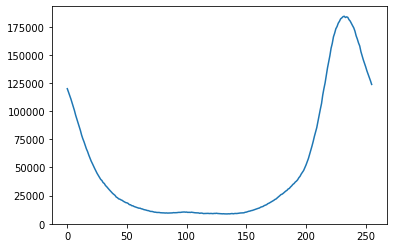

In [ ]:
hist_WOH = cv2.calcHist([slave[:, :, 0]-master[:, :, 0]], [0], None, [256], [0, 256])
plt.plot(hist_WOH)

WIth histogram_matching

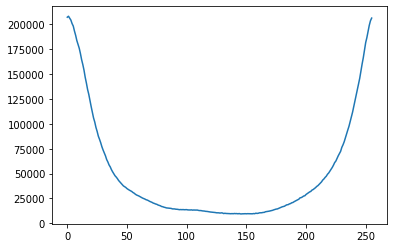

In [ ]:
hist_WH = cv2.calcHist([matched[:, :, 0]-master[:, :, 0]], [0], None, [256], [0, 256])
plt.plot(hist_WH)

8_thresholding operation with triangle method

In [ ]:
img_WH = matched[:, :, 0]-master[:, :, 0]
img_WOH = slave[:, :, 0]-master[:, :, 0]

im_WH = np.zeros_like(img_WH)
im_WH[img_WH>120] = 1

im_WOH = np.zeros_like(img_WOH)
im_WOH[img_WOH>100] = 1


9_Show resualts

In [ ]:
plt.figure(figsize=(10, 10), dpi=150)
plt.imshow(im_WOH, cmap = 'gray')

plt.figure(figsize=(10, 10), dpi=150)
plt.imshow(im_WH, cmap = 'gray')

finally we can detect the diffrence between images better with thresholding and also , we have better resualt with histogram matching
